In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("csv files/Quality of Service 5G.csv")


In [4]:
df

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%


DATA PREPROCESSING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [6]:
#check for null values
df.isna().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [7]:
#check for duplicated values
df.duplicated().sum()

0

In [8]:
#start with encoding df['Application_Type]

df['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

These all categories can be arranged in increasing Ordered form of Resource requirement:

IoT_Temperature
Web_Browsing
VoIP_Call
Video_Call
File_Download
Background_Download
Streaming
Video_Streaming
Online_Gaming
Emergency_Service

In [9]:
#Ordinal Encoding technique to transform the text data to numeric values

In [10]:
from sklearn.preprocessing import OrdinalEncoder

#Arrange data into ordered categories
data = [['IoT_Temperature','Web_Browsing','VoIP_Call','Voice_Call','Video_Call','File_Download', 'Background_Download',
         'Streaming','Video_Streaming','Online_Gaming', 'Emergency_Service']]

encoder = OrdinalEncoder(categories= data)

print(df['Application_Type'].unique())
df['Application_Type'] = encoder.fit_transform(np.array(df['Application_Type']).reshape(-1,1))

print(df['Application_Type'].unique())

['Video_Call' 'Voice_Call' 'Streaming' 'Emergency_Service' 'Online_Gaming'
 'Background_Download' 'Web_Browsing' 'IoT_Temperature' 'Video_Streaming'
 'File_Download' 'VoIP_Call']
[ 4.  3.  7. 10.  9.  6.  1.  0.  8.  5.  2.]


c:\Users\mansi\anaconda3\lib\site-packages\sklearn\utils\multiclass.py:13: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
c:\Users\mansi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
c:\Users\mansi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:111: DeprecationWarning: `np.bool` is a depreca

In [11]:
#remove unwanted substr and convert df['Resource_Allocation'] to int dtype

df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%','').astype('int') 

In [12]:
#remove unwanted substr and convert df['User_ID'] to int dtype

df['User_ID'] = df['User_ID'].str.replace('User_','').astype('int')


In [13]:
#Bandwidth contains two units :Kbps and Mbps , where Mbps = 1000*Kbps
#Mbps : Convert to Kbps
#Kbps : Leave it as it is

def mbps_to_kbps(value):
    if 'Mbps' in value:
        n = float(value.replace(' Mbps', ''))
        return str(n*1000) + ' Kbps'
    else:
        return value
    
df['Required_Bandwidth'] = df['Required_Bandwidth'].map(mbps_to_kbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].map(mbps_to_kbps)

In [14]:
#Remove unwanted substr and convert df['Latency'] to int dtype
df['Latency'] = df['Latency'].str.replace(' ms','').astype('int')

In [15]:
# Remove unwanted substr and convert df['Signal_Strength'] to int dtype
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm','').astype('int')

In [16]:
#Cast 'Timestamp' col dtype fro object to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    int32         
 2   Application_Type     400 non-null    float64       
 3   Signal_Strength      400 non-null    int32         
 4   Latency              400 non-null    int32         
 5   Required_Bandwidth   400 non-null    object        
 6   Allocated_Bandwidth  400 non-null    object        
 7   Resource_Allocation  400 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(2)
memory usage: 18.9+ KB


In [18]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,1,4.0,-75,30,10000.0 Kbps,15000.0 Kbps,70
1,2023-09-03 10:00:00,2,3.0,-80,20,100 Kbps,120 Kbps,80
2,2023-09-03 10:00:00,3,7.0,-85,40,5000.0 Kbps,6000.0 Kbps,75
3,2023-09-03 10:00:00,4,10.0,-70,10,1000.0 Kbps,1500.0 Kbps,90
4,2023-09-03 10:00:00,5,9.0,-78,25,2000.0 Kbps,3000.0 Kbps,85


In [19]:
df.tail()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
395,2023-09-03 10:06:00,396,7.0,-110,61,1300.0 Kbps,1800.0 Kbps,85
396,2023-09-03 10:06:00,397,4.0,-40,53,14500.0 Kbps,15800.0 Kbps,75
397,2023-09-03 10:06:00,398,8.0,-113,58,1000.0 Kbps,1400.0 Kbps,70
398,2023-09-03 10:06:00,399,10.0,-40,5,400.0 Kbps,400.0 Kbps,70
399,2023-09-03 10:06:00,400,1.0,-113,0,100.0 Kbps,100.0 Kbps,70


In [20]:
df.describe()

,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,5.605000,-80.495000,33.825000,74.712500
std,115.614301,3.156562,20.701119,21.122139,8.982291
min,1.000000,0.000000,-123.000000,0.000000,50.000000
25%,100.750000,2.000000,-98.000000,21.750000,70.000000
50%,200.500000,6.000000,-83.000000,31.000000,70.000000
75%,300.250000,8.000000,-64.000000,45.000000,80.000000
max,400.000000,10.000000,-40.000000,110.000000,90.000000


In [21]:
#'User_ID' having very less effect on result , so remove it
df.drop('User_ID', axis=1,inplace=True)

In [22]:
df

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,4.0,-75,30,10000.0 Kbps,15000.0 Kbps,70
1,2023-09-03 10:00:00,3.0,-80,20,100 Kbps,120 Kbps,80
2,2023-09-03 10:00:00,7.0,-85,40,5000.0 Kbps,6000.0 Kbps,75
3,2023-09-03 10:00:00,10.0,-70,10,1000.0 Kbps,1500.0 Kbps,90
4,2023-09-03 10:00:00,9.0,-78,25,2000.0 Kbps,3000.0 Kbps,85
...,...,...,...,...,...,...,...
395,2023-09-03 10:06:00,7.0,-110,61,1300.0 Kbps,1800.0 Kbps,85
396,2023-09-03 10:06:00,4.0,-40,53,14500.0 Kbps,15800.0 Kbps,75
397,2023-09-03 10:06:00,8.0,-113,58,1000.0 Kbps,1400.0 Kbps,70
398,2023-09-03 10:06:00,10.0,-40,5,400.0 Kbps,400.0 Kbps,70


DATA VISUALIZATION

<Axes: xlabel='Resource_Allocation', ylabel='count'>

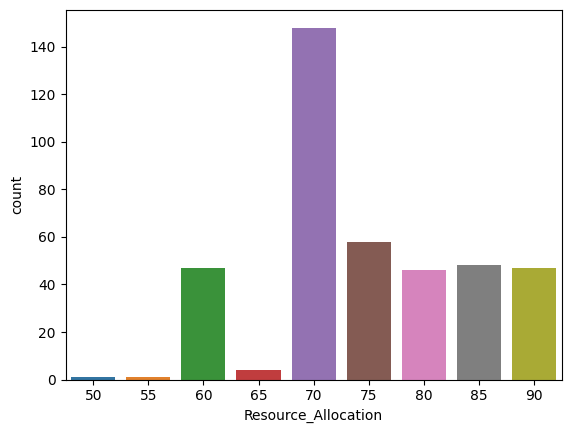

In [23]:
#FIND COUNT OF VALUES IN TARGET VARIABLE
sns.countplot(x=df['Resource_Allocation'])